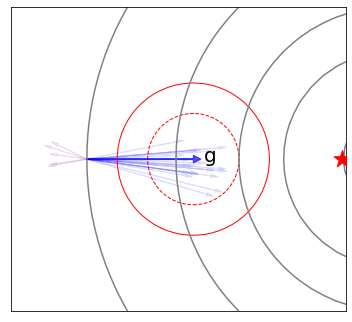

In [1]:
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects

cir_center = (-0.3, 1)
cur_point = np.array([-1, 1])
np.random.seed(1)
sz = 40
sample_sz = 30
mean = np.array(cir_center)
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, 20)

malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, 5)
fig, ax = plt.subplots(figsize=(6, 12))
nx = 101
ny = 105
xvec = np.linspace(-4, 4.0, nx)
yvec = np.linspace(-4, 4.0, ny)

x1, x2 = np.meshgrid(xvec, yvec)
obj = x1**2 + x2**2 - 2*x1 - 2*x2 + 2


ax.scatter(0.68, 1.0, s=320, marker='*', color='red', zorder=3)
cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors='gray')

cir1 = plt.Circle(cir_center, 0.3, color='red', fill=False, linestyle='--')
ax.add_patch(cir1)

for d in benign:
    ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] + 1, dy=d[1] - 1, width=0.002, color="blue",  alpha=0.1,
             head_width=0.02, head_length=0.05, overhang=0)

for d in malicious:
    ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] + 1, dy=d[1] - 1, width=0.002, color="purple",  alpha=0.1,
             head_width=0.02, head_length=0.05, overhang=0)
    
ax.arrow(x=cur_point[0], y=cur_point[1], dx=cir_center[0] + 1, dy=cir_center[1] - 1, width=0.007, color="blue",  alpha=0.7,
             head_width=0.05, head_length=0.05, overhang=0)

cir1 = plt.Circle(cir_center, 0.5, color='red', fill=False)
ax.add_patch(cir1)
ax.set_xlim(-1.5, 0.7)
ax.set_ylim(-0., 2)
ax.annotate('g', (cir_center[0]+0.07,cir_center[1]-0.02),fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("contour0.pdf", bbox_inches = "tight")

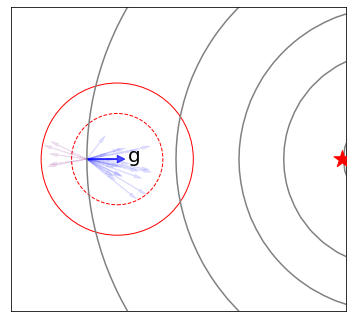

In [2]:
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects

cir_center = (-0.8, 1)
cur_point = np.array([-1, 1])
np.random.seed(1)
sz = 40
sample_sz = 30
mean = np.array(cir_center)
cov = np.array([[0.01, 0], [0, 0.01]])
benign = np.random.multivariate_normal(mean, cov, 20)

malicious = np.random.multivariate_normal((-1.2, 1), 0.2 * cov, 5)
fig, ax = plt.subplots(figsize=(6, 12))
nx = 101
ny = 105
xvec = np.linspace(-4, 4.0, nx)
yvec = np.linspace(-4, 4.0, ny)

x1, x2 = np.meshgrid(xvec, yvec)
obj = x1**2 + x2**2 - 2*x1 - 2*x2 + 2


ax.scatter(0.68, 1.0, s=320, marker='*', color='red', zorder=3)
cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors='gray')

cir1 = plt.Circle(cir_center, 0.3, color='red', fill=False, linestyle='--')
ax.add_patch(cir1)

for d in benign:
    ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] + 1, dy=d[1] - 1, width=0.002, color="blue",  alpha=0.1,
             head_width=0.02, head_length=0.05, overhang=0)

for d in malicious:
    ax.arrow(x=cur_point[0], y=cur_point[1], dx=d[0] + 1, dy=d[1] - 1, width=0.002, color="purple",  alpha=0.1,
             head_width=0.02, head_length=0.05, overhang=0)
    
ax.arrow(x=cur_point[0], y=cur_point[1], dx=cir_center[0] + 1, dy=cir_center[1] - 1, width=0.007, color="blue",  alpha=0.7,
             head_width=0.05, head_length=0.05, overhang=0)

cir1 = plt.Circle(cir_center, 0.5, color='red', fill=False)
ax.add_patch(cir1)
ax.set_xlim(-1.5, 0.7)
ax.set_ylim(-0., 2)
ax.annotate('g', (cir_center[0]+0.07,cir_center[1]-0.02),fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')
ax.set_xticks([])
ax.set_yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("contour1.pdf", bbox_inches = "tight")